This demonstrates all the steps in my candidate selection before conducting visual inspection

In [1]:
import numpy as np
import splat
import wisps.data_analysis as wispd
from wisps.data_analysis import selection_criteria as sel_crt
import shapey
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import wisps

import matplotlib as mpl

from tqdm import tqdm
import random
import matplotlib.pyplot as plt
%matplotlib inline

Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database


In [2]:
#some functions 
def get_indices(x):
    if x is None :
        return pd.Series({})
    else:
        return  pd.concat([pd.Series(x.indices), pd.Series(x.mags), pd.Series(x.snr)])
    
def get_spt(x):
    if x is None:
        return np.nan
    else:
        return x.spectral_type[0]
#change f-test definition
def f_test_fx(x, df1, df2):
    return stats.f.cdf(x, df1, df2)

def box_parameters(idx, spt_range):
    bs=idx.shapes
    b=[x for x in bs if x.shape_name==spt_range][0]
    print ('{}  {} m: {} b: {} s:{}, comp : {}, cont: {}'.format(spt_range, idx,  round(b.coeffs[0], 2), round(b.coeffs[1], 2), round(b.scatter, 2), round(idx.completeness[spt_range], 2),  round(idx.contamination[spt_range], 3)))

In [3]:
cands=pd.read_pickle(wisps.LIBRARIES+'/new_real_ucds.pkl')

In [4]:
#use the same columns for all data sets
alldata=wisps.get_big_file()
spex=wisps.Annotator.reformat_table(wisps.datasets['spex'])

cands['line_chi']=cands.spectra.apply(lambda x : x.line_chi)
cands['spex_chi']=cands.spectra.apply(lambda x: x.spex_chi)
cands['f_test']=cands.spectra.apply(lambda x: x.f_test)

spex_df=wisps.Annotator.reformat_table(wisps.datasets['spex']).reset_index(drop=True)
manj=wisps.Annotator.reformat_table(wisps.datasets['manjavacas']).reset_index(drop=True)
schn=wisps.Annotator.reformat_table(wisps.datasets['schneider']).reset_index(drop=True)
ydwarfs=(manj[manj['spt'].apply(wisps.make_spt_number)>38].append(schn)).reset_index(drop=True)
spex_df['spt']=np.vstack(spex_df['spt'].values)[:,0]
manj['spt']=np.vstack(manj['spt'].values)[:,0]
schn['spt']=np.vstack(schn['spt'].values)[:,0]

cands.grism_id=cands.grism_id.apply(lambda x: x.lower())

cands['spt']=np.vstack(cands['spt'].values)
                           

In [5]:
#add x values 
spex['x']=spex.spex_chi/spex.line_chi
alldata['x']=alldata.spex_chi/alldata.line_chi
cands['x']=cands.spex_chi/cands.line_chi

spex['f_test']=f_test_fx(spex.x.values, spex.dof.values-1, spex.dof.values-2)
alldata['f_test']=f_test_fx(alldata.x.values, alldata.nG141.values-1, alldata.nG141.values-2)

alldata=alldata.sort_values('x')
spex=spex.sort_values('x')
cands=cands.sort_values('x')

In [6]:
alldata['datalabel']='alldata'
spex['datalabel']='spex'
cands['datalabel']='ucds'
combined_ftest_df=pd.concat([cands, spex, alldata[(alldata.snr1>=3.) &  (alldata.mstar_flag !=0)]])

In [7]:
#stats.f.cdf(.85564068, 108-1, 108+2)

In [8]:
#list(spex[['x', 'dof']][spex.f_test.values >0.2].values)

In [9]:
len(spex[np.logical_and(spex.f_test.values > 0.9, np.vstack(spex.spt.values)[:,0] >=17.)])/len(spex)

0.012860483242400623

In [10]:
len(spex[np.logical_and(spex.f_test.values < 0.02, np.vstack(spex.spt.values)[:,0] >=17.)])/len(spex)

0.798908807482463

In [11]:
len(cands[np.logical_and(cands.f_test.values > 0.9, np.vstack(cands.spt.values)[:,0] >=17.)])/len(cands)

0.0

In [12]:
len(cands[np.logical_and(cands.f_test.values < 0.02, np.vstack(cands.spt.values)[:,0] >=17.)])/len(cands)

0.9878787878787879

In [13]:
#star_ids=alldata[alldata['class_star'] !=0]
#stars=wisps.Annotator.reformat_table(star_ids).reset_index(drop=True)
#cy=stars[stars.grism_id.isin(cx.grism_id)]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


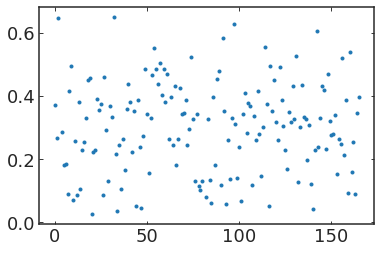

In [14]:
plt.plot(cands.x[cands.x<1.], '.')

In [15]:
dt=alldata[(alldata.f_test<0.02) &   (alldata.snr1>=3.) &  (alldata.mstar_flag !=0)].reset_index(drop=True)
dt['spt']=(dt['spt']).apply(wisps.make_spt_number).apply(float)

In [16]:
dt=wisps.Annotator.reformat_table(dt).reset_index(drop=True)

In [17]:
len(alldata[(alldata.f_test<0.02) &   (alldata.snr1>=3.) &  (alldata.mstar_flag !=0)])

7392

In [18]:
wisps.datasets.keys()

dict_keys(['spex', 'subd', 'manjavacas', 'schneider', 'ucd_data'])

In [ ]:
s=

In [19]:
#wisps.Annotator.reformat_table(wisps.datasets['subd'])

In [20]:
#get criteria 
##only run this if new data
gbhio=sel_crt.save_criteria(conts=dt)
crts=sel_crt.crts_from_file()
contamns=pd.DataFrame([ x.contamination for x in crts.values()])
compls=pd.DataFrame([ x.completeness for x in crts.values()])

contamns.index=[x for x in crts.keys()]
compls.index=[x for x in crts.keys()]

  0%|          | 0/120 [00:00<?, ?it/s]


                                   H_2O-1/J-Cont  \
1      (0.9877222942222559, 0.01538306258892232)   
2      (0.9894581356361968, 0.01832897590627683)   
5      (1.0273497666176268, 0.00894342261767974)   
7     (0.9052853595047226, 0.014568258357838803)   
10     (1.0592244114645273, 0.02080616240180751)   
16     (0.9533624906313637, 0.01996922545609339)   
17    (1.0252126850114571, 0.021812028106100907)   
24     (0.943202883154658, 0.008261315831926738)   
25    (0.9405917956814457, 0.008174109325398271)   
26    (1.0187043673911578, 0.014565032404817836)   
30     (1.009822462001476, 0.032329608991326045)   
33    (0.9101904255736111, 0.014763478491502184)   
37    (0.9566257384173351, 0.019736203074726632)   
43    (1.0454034434224844, 0.012307951561224852)   
53    (0.7287515854240871, 0.010903493203462684)   
55     (1.055719646043543, 0.016347372655427028)   
61     (1.010814488202124, 0.021775490864027535)   
63     (0.9848471191125634, 0.03582997819314132)   
68    (1.002

AttributeError: 'tuple' object has no attribute 'dtype'

In [ ]:
%%capture
'''
contamns.style.apply(lambda x: ["background-color: #7FDBFF" 
                          if (i >= 0 and (v < 0.1 
                                          and v > 0. )) 
                          else "" for i, v in enumerate(x)], axis = 1)
'''

In [ ]:
def get_toplowest_contam(subtype, n):
    top=contamns.sort_values('L5-T0')[:n]
    return {subtype: [x  for x in top.index]}

In [ ]:
ordered={}
for k in ['M7-L0', 'L0-L5', 'L5-T0', 'T0-T5', 'T5-T9', 'Y dwarfs', 'subdwarfs']:
    ordered.update(get_toplowest_contam(k, 6))

In [ ]:
to_use= ordered


In [ ]:
spex['spt']=np.vstack(spex.spt.values)[:,0]

In [ ]:
from tqdm import tqdm

In [ ]:
def multiplte_indices_selection(k):
    stat_dict={}
    indices= [crts[index_name] for index_name in to_use[k]]
    #make selections for each index separately
    cand_bools=[]
    spex_bools=[]
    trash_bools=[]
    for idx in indices:
        xkey=idx.xkey
        ykey=idx.ykey
        bx=[x for x in idx.shapes if x.shape_name==k][0]
        _, cbools=bx._select(np.array([cands[xkey].values,cands[ykey].values]))
        _, spbools=bx._select(np.array([spex[xkey].values,spex[ykey].values]))
        _, trbools=bx._select(np.array([dt[xkey].values, dt[ykey].values]))
        
        cand_bools.append(cbools)
        spex_bools.append(spbools)
        trash_bools.append(trbools)
        
    cands_in_that_class_bool=cands.spt.apply(lambda x: wisps.is_in_that_classification(x, k))
    spex_in_that_class_bool=spex.spt.apply(lambda x: wisps.is_in_that_classification(x, k))

    cand_bools.append(cands_in_that_class_bool)
    spex_bools.append(spex_in_that_class_bool)
    
    cands_selected=cands[np.logical_and.reduce(cand_bools, axis=0)]
    spexs_selected=spex[np.logical_and.reduce(spex_bools, axis=0)]
    
    print (' {} selected {} out of {} UCDS'.format(k, len( cands_selected), len(cands[cands_in_that_class_bool])))
    print ('overall completeness {}'.format( len(spexs_selected)/len(spex[spex_in_that_class_bool])))
    print ('total contaminants {}'.format(len(dt[np.logical_and.reduce(trash_bools)])))
    print ('-------------------------------------------')

In [ ]:
#for k in ['M7-L0', 'L0-L5', 'L5-T0', 'T0-T5', 'T5-T9', 'Y dwarfs']:
#    multiplte_indices_selection(k)

In [ ]:
contamns.idxmin(axis=0)

In [ ]:
from collections import OrderedDict
ordered=[(k, contamns.idxmin(axis=0)[k]) for k in ['M7-L0', 'L0-L5', 'L5-T0', 'T0-T5', 'T5-T9', 'Y dwarfs', 'subdwarfs']]
to_use=  [ (y, x) for x, y in ordered]

In [ ]:
to_use

In [ ]:
import pickle
#save the random forest
output_file=wisps.OUTPUT_FILES+'/best_indices_to_use.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(to_use,file)

In [ ]:
fp={}

In [ ]:
cands=cands[cands.grism_id.isin(dt.grism_id)]

In [ ]:
def plot_index_box(index_name, box_name, ax):
    
    #get the index and the box
    idx=crts[index_name]
    bx=[x for x in idx.shapes if x.shape_name==box_name][0]
    
    xkey=idx.xkey
    ykey=idx.ykey

    to_use_df=spex_df
    if box_name.lower()=='y dwarfs':
        to_use_df=ydwarfs
    if box_name.lower()=='subdwarfs':
        to_use_df=wisps.Annotator.reformat_table(idx.subdwarfs)
        to_use_df['spt']=17
        
    xlim=[ bx.xrange[0]-.5*abs(np.ptp(bx.xrange)), bx.xrange[1]+.5*abs(np.ptp(bx.xrange))]
    ylim=[ bx.yrange[0]-.5*abs(np.ptp(bx.yrange)), bx.yrange[1]+.5*abs(np.ptp(bx.yrange))]
    
    if box_name.upper()=='T5-T9':
        print ('changin scale')
        print (bx.xrange[1])
        xlim=[ bx.xrange[0]-0.2*abs(np.ptp(bx.xrange)), np.round(bx.xrange[1]+0.2*abs(np.ptp(bx.xrange)))]

    
    #remove nans from background
    bckgrd= dt[[xkey, ykey]].replace(-np.inf, np.nan).replace(np.inf, np.nan).dropna()
   # ax.scatter(bckgrd[xkey], bckgrd[ykey], s=1, c='#111111', label='Background')
    
    bckgrd=bckgrd[(bckgrd[xkey].between(xlim[0], xlim[1])) & (bckgrd[ykey].between(ylim[0], ylim[1]))]

    h=ax.hist2d(bckgrd[xkey].apply(float).values, bckgrd[ykey].apply(float).values, \
                cmap='gist_yarg', vmin=50, vmax=1000)
    
    cands_slctd, cands_bools=bx._select(np.array([cands[xkey].values,cands[ykey].values]))
   
    trash_slctd, trsh_bools=bx._select(np.array([dt[xkey].values, dt[ykey].values]))
    
    #simul_slctd, simul_bools=bx._select(np.array([simulated_data[xkey].values, simulated_data[ykey].values]))
    
    print (len(cands_slctd[0]), len((cands)))
    cands_in_that_class_bool=(cands).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    spexs_slctd_in_that_class_bool= (to_use_df).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    #simulated_in_that_class_bool=(simulated_data[simul_bools]).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    if box_name.lower()=='subdwarfs':
         spexs_slctd_in_that_class_bool=np.ones(len(to_use_df), dtype=bool)
    
    
   
    
    cands_in_that_class=np.array([cands_slctd[0], \
                                  cands_slctd[1]])
    
    #simulated_in_that_class= np.array([simul_slctd[0][simulated_in_that_class_bool], simul_slctd[1][simulated_in_that_class_bool]])
    
    spexs_slctd_in_that_class=np.array([to_use_df[xkey][spexs_slctd_in_that_class_bool], to_use_df[ykey][spexs_slctd_in_that_class_bool]])
    

    #ax.scatter( simulated_in_that_class[0],    simulated_in_that_class[1], facecolors='none', s=10, 
    #           edgecolors='#001f3f', label='simulated')
    
    ax.scatter(spexs_slctd_in_that_class[0], spexs_slctd_in_that_class[1],  facecolors='none',\
               edgecolors='#0074D9',  label='Templates', s=50.)

    #ax.scatter(cands[xkey], cands[ykey], marker='x', facecolors='#FF851B', s=40., alpha=0.5)
    
    
    ax.scatter( cands_in_that_class[0],    cands_in_that_class[1], marker ='+',  s=150., alpha=1.,
               facecolors='#FF851B', label='Discovered UCDs')
    ax.scatter(cands[xkey].values, cands[ykey].values, marker='+',  s=150., alpha=0.3,
               facecolors='#FF851B')
    
    
    bx.color='None'
    bx.alpha=1.
    bx.linewidth=3
    bx.linestyle='-'
    bx.edgecolor='#0074D9'
    bx.plot(ax=ax, only_shape=True, highlight=False)
    
    #cb = plt.colorbar(h[3], ax=ax, orientation='horizontal')
    #cb.set_label('Counts in bin', fontsize=16)
    
    plt.tight_layout()
    
    ax.set_xlabel(r'$'+str(idx.name.split(' ')[0])+'$', fontsize=14)
    ax.set_ylabel(r'$'+str(idx.name.split(' ')[1])+'$', fontsize=14)
    
    ax.set_title(box_name, fontsize=18)
    
    xbuffer=np.nanstd(to_use_df[[xkey,ykey]])
    
   
    
    ax.minorticks_on()
    

    if (trash_slctd.shape[1])==0:
        fprate=0.0
    else:
        fprate=(trash_slctd.shape[1]- cands_slctd.shape[1])/trash_slctd.shape[1]
        if box_name.lower()=='subdwarfs':
                fprate=1.
    
    fp[box_name]=  fprate
    
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    plt.tight_layout()
    print (' {} selected {}'.format(box_name, len(bx.select( bckgrd))))
    
    return {str(box_name): bx}
    
    

In [ ]:
to_use

In [ ]:
idx=crts[to_use[1][0]]

In [ ]:
import matplotlib

In [ ]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(12, 14))

bxs=[]
for idx, k in enumerate(to_use):
    print (idx, k)
    b=plot_index_box( k[0], k[1], np.concatenate(ax)[idx])
    bxs.append(b)



plt.tight_layout()

cax = fig.add_axes([0.5, 0.1, .3, 0.03])
norm= matplotlib.colors.Normalize(vmin=50,vmax=1000)
mp=matplotlib.cm.ScalarMappable(norm=norm, cmap='gist_yarg')# vmin=10, vmax=5000)
cbar=plt.colorbar(mp, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Number of Contaminants', fontsize=18)


fig.delaxes(np.concatenate(ax)[-1])
fig.delaxes(np.concatenate(ax)[-2])



np.concatenate(ax)[-4].set_title(r'$\geq$ T9 ', fontsize=18)
#subdindx_index_crt=crts['H_2O-1/J-Cont H_2O-2/H_2O-1']
#subdrfs=wisps.Annotator.reformat_table(dummy_index_crt.subdwarfs)
#tpls=wisps.Annotator.reformat_table(spex_df[spex_df.metallicity_class.isna()])
#a=np.concatenate(ax)[-1]
#tpls=tpls[tpls.spt>16]

#a.scatter(dt[subdindx_index_crt.xkey], dt[subdindx_index_crt.ykey], s=1., c='#111111', alpha=0.1)
#a.scatter(tpls[subdindx_index_crt.xkey], tpls[subdindx_index_crt.ykey], marker='+', facecolors='#0074D9',  label='SpeX', s=5.)
#a.scatter(subdrfs[subdindx_index_crt.xkey], subdrfs[subdindx_index_crt.ykey], marker='+', facecolors='#2ECC40',  label='SpeX', s=30.)


#a.set_xlim([0., 1.35])
#a.set_ylim([0., 1.25])
#a.set_title('subdwarfs', fontsize=18)
#a.set_xlabel(r'$'+str(subdindx_index_crt.name.split(' ')[0])+'$', fontsize=15)
#a.set_ylabel(r'$'+str(subdindx_index_crt.name.split(' ')[1])+'$', fontsize=15)

np.concatenate(ax)[-3].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(wisps.OUTPUT_FIGURES+'/index_index_plots.pdf', 
            bbox_inches='tight', rasterized=True,  dpi=150)

In [ ]:
#.grism_id.to_csv('/users/caganze/desktop/true_brown_dwarfs.csv')

In [ ]:
bx_dict={}
for b in bxs:
    bx_dict.update(b)

In [ ]:
#invert to use
inv_to_use = {v: k for k, v in to_use}

In [ ]:
ncandidates=[]
for spt_range in bx_dict.keys():
    idx_name=inv_to_use[spt_range]
    idx=crts[idx_name]
    s, bools=(bx_dict[spt_range])._select(np.array([dt[idx.xkey].values, dt[idx.ykey].values]))
    ncandidates.append(dt[bools])

In [ ]:
candsss=(pd.concat(ncandidates).drop_duplicates(subset='grism_id'))
cands.grism_id=cands.grism_id.apply(lambda x: x.lower().strip())
good_indices=[crts[x] for x in inv_to_use.values()]

In [ ]:
len(candsss), len(candsss[candsss.grism_id.isin(cands.grism_id.apply(lambda x: x.lower().strip())) & (candsss.spt.apply(wisps.make_spt_number)>16)])

In [ ]:
len(candsss.drop_duplicates('grism_id'))/len(alldata)

In [ ]:
len(candsss[candsss.grism_id.isin(cands.grism_id) & (candsss.spt.apply(wisps.make_spt_number).between(35, 40))])

In [ ]:
len(candsss), len(dt), len(alldata[alldata.mstar_flag !=0])

In [ ]:
len(dt)/len(alldata)

In [ ]:
candsss.to_pickle(wisps.OUTPUT_FILES+'/selected_by_indices.pkl')

In [ ]:
#print out table
def round_tuple(tpl, n=2):
    return round(tpl[0], n), round(tpl[1],n)

for index, k in to_use:
    spt_range=k
    sindex=crts[index]
    bs=sindex.shapes
    bs=[x for x in bs if x.shape_name==spt_range]

    bx=bs[0]
    
    print (" {} & {} &  {} & {} & {} & {} & {} & {} & {}  & {} \\\ ".format(spt_range,sindex.xkey, sindex.ykey, 
                                                                           round_tuple(bx.vertices[0]), round_tuple(bx.vertices[1])
                                                                          , round_tuple(bx.vertices[2]), round_tuple(bx.vertices[3]),
                                                                          round(sindex.completeness[spt_range], 2), 
                                                                            round(sindex.contamination[spt_range], 7),
                                                                           round(fp[spt_range],6)))
    

In [ ]:
len(candsss)

In [ ]:
#ghjk

In [ ]:
stars= alldata[alldata.mstar_flag !=0]

In [ ]:
cands_dff=(cands[np.logical_and(cands['snr1'] >=3., cands['spt'] >=17)]).sort_values('spt')
spex_df=spex_df.sort_values('spt')

star_snr=stars[['snr1', 'snr2', 'snr3', 'snr4']].apply(np.log10).dropna()
star_snr=(star_snr[star_snr.snr1.between(-1, 4) & star_snr.snr3.between(-1, 4) & star_snr.snr4.between(-1, 4)]).reset_index(drop=True)


fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(12, 6))

h=ax.hist2d(star_snr['snr1'], star_snr['snr3'], cmap='gist_yarg', bins=10, label='Point Sources')
#ax.scatter(star_snr['snr1'], star_snr['snr3'], c='#111111', s=1, alpha=0.1)
cb = plt.colorbar(h[3], ax=ax, orientation='horizontal')
cb.set_label('Counts in bin', fontsize=16)
plt.tight_layout()

#ax.scatter(star_snr['snr1'],  star_snr['snr4'], s=1., c='k', alpha=0.1, 
#            label='3D-HST or WISP')


ax.scatter(spex_df['snr1'].apply(np.log10), spex_df['snr3'].apply(np.log10),
            s=10, c=spex_df.spt, 
            cmap='coolwarm',  marker='o', alpha=0.1, vmin=15, vmax=40) 
ax.scatter(spex_df['snr1'].apply(np.log10)[0], spex_df['snr3'].apply(np.log10)[0],
            s=10, c=spex_df.spt[0], 
            cmap='coolwarm', label='Templates', marker='o', alpha=1., vmin=15, vmax=40) 
ax.scatter(cands_dff['snr1'].apply(np.log10), cands_dff['snr3'].apply(np.log10), 
           c=cands_dff['spt'], s=40,  marker='*', cmap='coolwarm', label='UCDs'
           , vmin=15, vmax=40) 
ax.set_xlim([-0.5, 4])
ax.set_ylim([-0.5, 4])
ax.set_xlabel('Log J-SNR', fontsize=18)
ax.set_ylabel('Log H-SNR', fontsize=18)
ax.legend(fontsize=18, loc='upper left')

ax.axhline(np.log10(3), c='k', xmin=np.log10(3)-0.2, linestyle='--')
ax.axvline(np.log10(3), c='k', ymin=np.log10(3)-0.2, linestyle='--')



#ax1.scatter(stars['snr1'].apply(np.log10), stars['snr4'].apply(np.log10), s=1., c='k', alpha=0.1, 
#            label='3D-HST or WISP')
#ax1.scatter(star_snr['snr1'], star_snr['snr4'], c='#111111', s=1, alpha=0.1)
h1=ax1.hist2d(star_snr['snr1'], star_snr['snr4'], cmap='gist_yarg', bins=10, label='Point Sources')

mp=ax1.scatter(spex_df['snr1'].apply(np.log10), spex_df['snr4'].apply(np.log10), s=10, c=spex_df.spt, 
            cmap='coolwarm', label='Templates',  marker='o', alpha=0.1, vmin=15, vmax=40)

ax1.scatter(cands_dff['snr1'].apply(np.log10), cands_dff['snr4'].apply(np.log10), 
                       c=cands_dff['spt'], s=40, marker='*', cmap='coolwarm', label='UCDs',  vmin=15, vmax=40) 
ax1.set_xlim([-0.5, 4])
ax1.set_ylim([-0.5, 4])
ax1.set_xlabel(' Log J-SNR', fontsize=18)
ax1.set_ylabel('Log MEDIAN-SNR', fontsize=18)
#ax.legend(fontsize=18)

ax1.axhline(np.log10(3), c='k', xmin=np.log10(3)-0.2, linestyle='--')
ax1.axvline(np.log10(3), c='k', ymin=np.log10(3)-0.2, linestyle='--')

cb1 = plt.colorbar(h1[3], ax=ax1, orientation='horizontal')
cb1.set_label('Counts in bin', fontsize=16)
#plt.tight_layout()
import matplotlib
cax = fig.add_axes([1.01, 0.21, .03, 0.7])
norm= matplotlib.colors.Normalize(vmin=15,vmax=40)
mp=matplotlib.cm.ScalarMappable(norm=norm, cmap='coolwarm')
cbar=plt.colorbar(mp, cax=cax, orientation='vertical')
cbar.ax.set_ylabel(r'Spectral Type', fontsize=18)

ax.minorticks_on()
ax1.minorticks_on()

cbar.ax.set_yticks([ 17, 20, 25, 30, 35, 40])
cbar.ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/snr_cutplots.pdf', \
            bbox_inches='tight',rasterized=True,  dpi=100)

In [ ]:
#import wisps

In [ ]:
big=wisps.get_big_file()
bigsnr=big[big.snr1>=3.]

In [ ]:
#

In [ ]:
fig, ax=plt.subplots(figsize=(10, 6))
h=ax.hist(big.snr1.apply(np.log10).values, range=[-3, 4], bins=32, histtype='step',  linestyle=':', 
          label='All', log=True, linewidth=3)
h=ax.hist(stars.snr1.apply(np.log10).values, range=[-3, 4], bins=32, histtype='step', linewidth=3, label='Point Sources',
          linestyle='--', log=True)
h=ax.hist(stars[stars.snr1>3].snr1.apply(np.log10).values, range=[-3, 4], bins=32, histtype='step', linewidth=3,
          label='Selected',
          log=True)
#h=ax.hist(bigsnr.snr1.apply(np.log10).values, range=[-3, 4], bins=32, histtype='step', linewidth=3, log=True)
ax.minorticks_on()
plt.xlabel('Log SNR')
plt.ylabel('Number')
plt.legend()
plt.savefig(wisps.OUTPUT_FIGURES+'/snr_distribution.pdf', bbox_inches='tight',  facecolor='white', transparent=False)

In [ ]:
#s3=wisps.Source(filename='goodss-01-G141_47749')
#s4=wisps.Source(filename='goodss-01-G141_45524')

In [ ]:
bools=np.logical_and(stars.snr1.between(3, 1000), stars.f_test.between(1e-3, 1))

In [ ]:
#s4._best_fit_line

fig, ax=plt.subplots(figsize=(8, 8))
plt.plot(s4.wave, s4.flux, color='#111111', label='Flux')
plt.plot(s4.wave, s4.noise,  '#39CCCC', label='Noise')
std=splat.getStandard(s4.spectral_type[0])
std.normalize(range=[1.2, 1.5])
chi, scale=splat.compareSpectra(s4.splat_spectrum, std,  comprange=[[1.2, 1.5]], statistic='chisqr', scale=True) 
std.scale(scale)
plt.plot(std.wave, std.flux, color='y', label='Best fit template')
plt.plot( s4._best_fit_line[0], color='#FF4136', label='Best fit line')
plt.xlim([1.1, 1.7])
plt.ylim([0, 0.1])
plt.xlabel('Wavelength (micron)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.savefig(wisps.OUTPUT_FIGURES+'/example_line_fit.pdf', bbox_inches='tight',  facecolor='white', transparent=False)

In [ ]:
compls.keys()

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))

#for k in  ['L0-L5', 'L5-T0', 'M7-L0', 'T0-T5', 'T5-T9','subdwarfs']:
ax.scatter(compls['M7-L0'].values, contamns['M7-L0'].values,  facecolors='none', edgecolors='#0074D9', 
           label='M7-L0')
ax.scatter(compls['L0-L5'].values, contamns['L0-L5'].values, marker='^',  facecolors='none',\
           edgecolors='#FF851B', label='L0-L5')

ax.scatter(compls['L5-T0'].values, contamns['L5-T0'].values, marker='s',  facecolors='none',
           edgecolors='#2ECC40', label='L5-T0')

ax.scatter(compls['T0-T5'].values, contamns['T0-T5'].values, marker='$...$',  facecolors='none', 
           edgecolors='#FF4136',
           label='T0-T5')
ax.scatter(compls['T5-T9'].values, contamns['T5-T9'].values, marker='X',  facecolors='none',
           edgecolors='#111111',
           label='T5-T9')
    #h=plt.hist(contams[k].values,  bins='auto', histtype='step',
    #      label='All', log=True, linewidth=3)
ax.set_xlabel('Completeness')
ax.set_ylabel('Contamination')
plt.legend()
ax.set_yscale('log')
plt.savefig(wisps.OUTPUT_FIGURES+'/completeness_contam.pdf', bbox_inches='tight',  facecolor='white', transparent=False)

In [ ]:
compl_contam_table=pd.DataFrame(columns=contamns.columns, index=contamns.index)

In [ ]:
for k in compl_contam_table.columns:
    for idx in compl_contam_table.index:
        compl_contam_table.loc[idx, k]=(round(compls.loc[idx, k], 2), \
                                        round(contamns.loc[idx, k], 3))
                                        

In [ ]:
(compl_contam_table[['M7-L0', 'L0-L5', 'T0-T5',\
                    'T5-T9', 'Y dwarfs', 'subdwarfs']]).to_latex()

In [21]:
s=wisps.Source(filename='goodss-11-g141_39408')

[(-1.0, 30.0)]

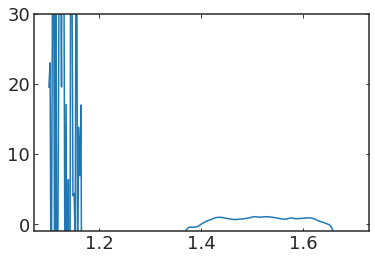

In [33]:
fig, ax=plt.subplots()
mask=np.logical_and(s.wave >1.1, s.wave<1.7)
plt.plot(s.wave[mask], s.flux[mask])
ax.set(ylim=[-1., 30.])